# TODO

In [7]:
import sys

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append('..')
from ehd_dataset import EHD_Loader

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
INDEX = "C:\Dropbox\SPEED\Self Driving EHD\Datasets\dataset_index.xlsx"
loader = EHD_Loader(INDEX)

Failed to load 10-Mar-2022 large nozzle mosaic: 'DataFrame' object has no attribute 'note'
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\29-Mar-2022 lg 1cm 300 points	263 points	offset 2	corr 0.4979414348873561
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\2-May-2022__run 1	121 points	offset 32	corr 0.6417618745477631
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\2-May-2022__run 2	528 points	offset 4	corr 0.6184015138069094
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\23-May-2022_squares	352 points	offset 8	corr 0.5521885646579606
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\24-May-2022 large harmonics	682 points	offset 0	corr 0.5871179189117662
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\8-Aug-2022_lg-square-20um	686 points	offset 1	corr 0.8454268563076222
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\10-Sep-2022_std-square-10um	149 points	offset 16	corr 0.7935638727333442
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\10-Sep-2022_std-square-

In [28]:
DATASETS = ('23-May-2022_squares',
            "8-Aug-2022_lg-square-20um",
            "10-Sep-2022_std-square-10um",
            "10-Sep-2022_std-square-20um",
            "13-Sep-2022_std-square-30um",
            "13-Sep-2022_std-square-40um",)
DATASET = DATASETS[5]
idx = loader.names.index(DATASET)
df = loader.datasets[idx].copy()
df['absolute volts'] = df.vector.apply(lambda x: np.abs(x[0]))
df['printed'] = df.area.apply(lambda x: x > 0)
df['width [s]'] = df.vector.apply(lambda x: x[-1] / 1024)

# df.head()

In [29]:
prints = df[df.area > 0].copy()
prints.sort_values(by='area', inplace=True)
# prints.head()

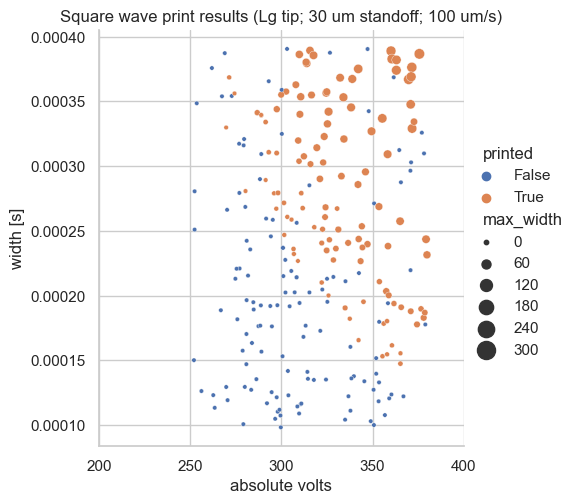

In [30]:
import seaborn as sns


sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=df,
    x="absolute volts", y="width [s]",
    hue="printed", size="max_width",
    sizes=(10, 200),
)
plt.xlim((200, 400))
plt.title('Square wave print results (Lg tip; 30 um standoff; 100 um/s)')
plt.savefig('square wave phase plot.png', dpi=1000, bbox_inches='tight', facecolor='w')